In [1]:
import sys
import os
sys.path.append('../code')
from init_mooc_nb import *
init_notebook()

# Set the path to a folder containing data files, to work with filters as well.
data_folder = 'data/' if os.path.exists('data') and os.path.isdir('data') else '../data/'

Populated the namespace with:
np, matplotlib, kwant, holoviews, init_notebook, interact, display_html, plt, pf, SimpleNamespace, pprint_matrix, scientific_number, pretty_fmt_complex
from code/edx_components:
MoocVideo, PreprintReference, MoocDiscussion, MoocCheckboxesAssessment, MoocMultipleChoiceAssessment, MoocPeerAssessment, MoocSelfAssessment
from code/functions:
spectrum, hamiltonian_array, h_k, pauli


Press this button to show/hide the code used in the notebook:

**No content above this line is visible in edX**

# Introduction

Anderson localization is introduced by Piet Brouwer from the Free University of Berlin.

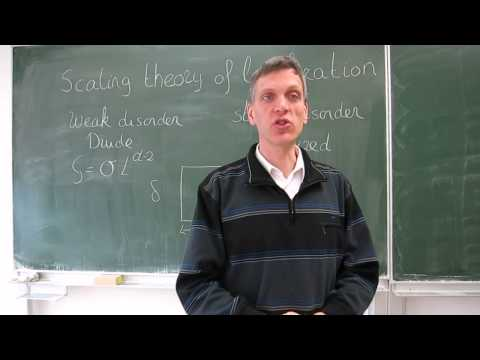

In [2]:
MoocVideo("sbbyL0RDH-o", src_location="9.1-intro")

# Motivation

At this point, you might be wondering how we got from talking about topological insulators to disordered metals. Well, we told you several times that topological states are supposed to be robust to disorder, and that this is one of the main reasons why they are so interesting.

Based on the arguments we made in previous weeks, you could convince yourselves that certain properties, such as the bulk boundary correspondence, are robust as long as disorder isn't enough to close the gap. However, many topological properties that we measure could in principle be susceptible to disorder.

For example, we told you that at the edge of a two-dimensional topological insulator, there is a perfectly conducting state that is robust to disorder. Remember however that we made no such claims about the surface states of a three-dimensional topological insulator! In fact, while in three dimensions the conductance is certainly susceptible to disorder, topology forbids it from becoming zero. Such subtle properties require a more detailed understanding of disorder.

# Simple limits: localized and extended states

When we speak of disorder in electronic systems, the main distinction we need to keep in mind is that between extended and localized states.

Let's start by thinking of a three dimensional metal with a low density of impurities, and hence weak disorder. In this limit, electrons moving through the system are only scattered by impurities every now and then, but otherwise they move ballistically between collisions. This picture is known as the [Drude model](http://en.wikipedia.org/wiki/Drude_model), and yields a conductivity given by

$$\sigma=n e^2\tau/m,$$

where $n$ is the electron density, $m$ is the electron mass and $\tau$ the mean free time between collisions. In this limit, the electron wave functions are extended throughout the bulk of the system, much like the plane waves of a clean crystal.

The other extreme is the strong disorder limit, in which there is a strongly fluctuating random potential in the material, for instance due to a high density of impurities. This potential has minima at random positions in the material, where electrons can become trapped. The corresponding wave functions are localized exponentially close to the minima. If the density of impurities is high in the material, all electronic states are of this type. In this situation, the only mechanism for conduction in the material is tunneling between different potential minima. However, the minima may be far apart from each other, which leads to a suppression of conductance and to an insulating state.

Let's discuss qualitatively the simplest effect of strong disorder on topological states, which are gapped. If we imagine a disorder potential with a Gaussian distribution, there are always "rare regions" where the disorder potential is very deep. Such potentials may thus yield energy levels in the middle of the gap. If disorder is strong, there might even be no energy gap at all! However, the electrons trapped in these rare regions are localized, and do not participate in any of the transport properties of the material.

>Thus, even weak disorder can close the energy gap, which is what protects topology, as discussed so far. However, since these localized states are isolated from each other, and most importantly from the edges, they do not affect any of the topological properties.

The considerations above make it clear that the presence or absence of an energy gap is not a good criterion to tell whether a system is insulating or not in the presence of strong disorder, and that we need to understand the nature of the electronic states in the system. Our definition of an insulating state must obey a new criterion. As will see next, this criterion can be obtained by studying conductance as a function of the system size.

# Conductance scaling

How can we really get away with understanding electrons in disordered potentials without doing any real quantum mechanical calculations? We can only do this in the two aforementioned extreme limits, and actually only in certain dimensions. In principle, to see how the "transition" from extended to localized electrons happens as disorder is increased, one must solve the full quantum mechanical problem. So far, it seems impossible to solve this problem exactly in any dimension other than 1D, so we won't bother and instead discuss an educated guess, which gives us most of the answer.

To start with, let us be more specific and consider the conductance $G(L)$ of a $d$-dimensional block with sides $L$. The conductance represents the ease with which electrons can propagate through the block, and is has the natural unit $G_0=e^2/h$. Therefore, we can think of the dimensionless conductance $g(L)=G(L)/G_0$ as sort of a higher dimensional analog of the average transmission of electrons between the ends of the system, multiplied by the number of channels. If we take the analogy with transmission seriously, we can guess that the conductance of a combination of blocks, each with conductance $g(L)$, has conductance $g'$ which depends on $g(L)$. This is not very different from what we expect classically. For example, consider a connected pair of metallic blocks of conductivity $g(L)$ each, such that the total conductivity of the connected blocks is $g'$. If the blocks are connected in series, then $g'=g(L)/2$. If they are connected in parallel, then $g'=2 g(L)$. 

We can extend the above guess due to Thouless to relate the conductance $g(L)$ of a block of size $L$ to that of a block of size $2L$ i.e. 

$$g(2L)=f(g(L)),$$

where $f$ is some function. We can use this equation to relate the conductances at a bunch of different length scales, but not quite at all continuous lengths. We could create a larger set of similar relations by increasing the block size by a factor of $b$ instead of $2$. By choosing $b=1+\delta{\lambda}$, we can write the equation

$$g(b L)=g(L(1+\delta\lambda))=g(L)+g(L)\beta(g(L))\delta\lambda,$$

where $\beta$ is a function called the scaling function or often simply the *beta function*. Taking the limit $\delta\lambda\rightarrow 0$ we obtain the *scaling equation*

$$\frac{d\textrm{ln}g}{d\textrm{ln}L}=\beta(g).$$

>This is the educated guess known as *single parameter scaling* that was adopted by  the "Gang of Four" (Abrahams, Anderson, Licciardello and Ramakrishnan) and is essentially an application of the idea of the [renormalization group](http://en.wikipedia.org/wiki/Renormalization_group) to the conductance problem. Of course, we don't quite know the function $\beta$, but as we will see in the next unit, it is possible to guess the form in various limits and this is enough to guess the qualitative behavior of the conductance.

While the above representation will be useful for understanding the "flow diagram", the above scaling hypothesis has a simple general solution 

$$g(L)=\Phi(L/\xi),$$

where $\Phi$ is a function that is determined entirely by $\beta$, and $\xi$ is a decay length.

# Scaling flow diagram

Now we are in a position to make use of the scaling hypothesis. We don't really know $\beta(g)$ in general, but we can compute it for large $g$ i.e. in the metallic/delocalized limit and also in the small $g$ or strongly localized limit. In the strongly localized limit $g\sim g_c e^{-L/\xi}$ so that $\beta(g)=\textrm{ln}(g/g_c)$, while in the weak scattering limit, we can estimate $g$ from the classical Drude formula so that $g\sim L^{(d-2)}$ and $\beta(g)\sim d-2$. In addition, one can calculate "quantum corrections" to the $\beta-$function at large $g$, which turn out to depend on other details such as the symmetry class of the disorder.

The simplest next step is to plot the function $\beta(g)$ using the simplest interpolation between the two limits. The amazing thing is that even the simplest interpolation allows us to guess the physics of the phase diagram. As a side note, this phase diagram is lost in the exact solution we wrote at the end of the last unit in terms of $\Phi$, which may seem counterintuitive to you. But let's move on to understanding the phase diagram. Below, we plot $\beta(g)$ as a function of $g$:

![](figures/conductance_scaling.svg)

What we see is that for dimensions $d=1,2$ the curve stays below $\beta\leq 0$, while the curve for $d=3$ intersects $\beta=0$. To make it easier to understand the diagram, we've turned it into a "flow diagram" by adding arrows along the curve representing how $g$ changes with system size $L$. If $\beta<0$ then the arrow points towards smaller values of $g$, but if $\beta>0$ the arrow points towards larger values of $g$. Thus, the flow diagram tells us that in $d=1,2$ dimensions, $g$ reduces with increasing system size, and therefore the system is insulating.

The situation is different in $d=3$ dimensions. If the conductance $g$ is large enough to begin with, then $\beta > 0$ and the arrow points to larger values of $g$. This means that the conductance grows with increasing system size. On the other hand, if disorder is large enough such that $\beta < 0$ initially, $g$ decreases as the system size increases. The separation point $\beta = 0$ between these two behaviours is the *metal-insulator transition*.

In [3]:
question = "How is the flow in the diagram above altered if we stack 10 1D systems next to each other and weakly couple them?"

answers = ["Nothing changes.",
           r"$\beta$ is multiplied by 10.",
           "The scaling hypothesis doesn't apply since we don't have a 1D system anymore.",
           r"$\beta$ is altered in some way, since we have a different disordered system now."]

explanation = "The scaling hypothesis tells us that the details of the Hamiltonian don't matter, so the scaling flow stays the same."

MoocMultipleChoiceAssessment(question=question, answers=answers, correct_answer=0, explanation=explanation)

MoocMultipleChoiceAssessment(**{'question': 'How is the flow in the diagram above altered if we stack 10 1D systems next to each other and weakly couple them?', 'answers': ['Nothing changes.', '$\\beta$ is multiplied by 10.', "The scaling hypothesis doesn't apply since we don't have a 1D system anymore.", '$\\beta$ is altered in some way, since we have a different disordered system now.'], 'display_name': 'Question', 'max_attempts': 2, 'correct_answer': 0, 'explanation': "The scaling hypothesis tells us that the details of the Hamiltonian don't matter, so the scaling flow stays the same."})

The 2D case is special: in the classical limit $g \gg 1$, the scaling flow disappears, $\beta \approx 0$. However, there remain *quantum corrections* to it. These are effects that get weaker with increasing conductance, and they depend on the symmetry class of the Hamiltonian.

Let's see what happens in the three simplest symmetry classes, those without sublattice or particle-hole symmetry. As we learned last week, these are class A (no symmetries, also called unitary since the matrix of Hamiltonian eigenvalues is unitary), AI ($\mathcal{T}^2 = 1$, orthogonal), and AII ($\mathcal{T} = -1$, symplectic).

A lengthy and technical calculation leads to the following corrections to the scaling flow at $g \gg 1$:

![](figures/conductance_scaling_2D.svg)

So we see that in symmetry classes A and AI the conductance always drops, even though it does so very slowly in the class A, eventually leading to an insulating phase.

The class AII has a critical metal-insulator transition point, and a metallic phase at $g > g_c$, just like a disordered 3D system. The growth of conductance in this system is much slower however: instead of $g \sim L$, in 2D AII we have $g \sim \log L$.

# Metal-insulator transition

The most interesting feature of the scaling theory of conductance that we have learned about so far is the existence of a universal critical point at which the behavior of the system changes from insulating (negative $\beta$ function) to metallic (positive $\beta$ function). This is the point $\beta=0$ which appears in 3D and in 2D in class AII. Let's study such a critical point in more detail.

The first thing to observe is that at the critical point, we have $d\ln g/ d\ln L = 0$, so the conductance takes a *scale-invariant* value $g=g_c$ which is independent of $L$.

In practice, this behavior can be observed at a fixed $L$ by varying one parameter $\alpha$ appearing in the model under study, typically the disorder strength or the chemical potential. The average conductance $\langle g \rangle$ is then computed as a function of $\alpha$ for different values of $L$. One then obtains a plot like the following:

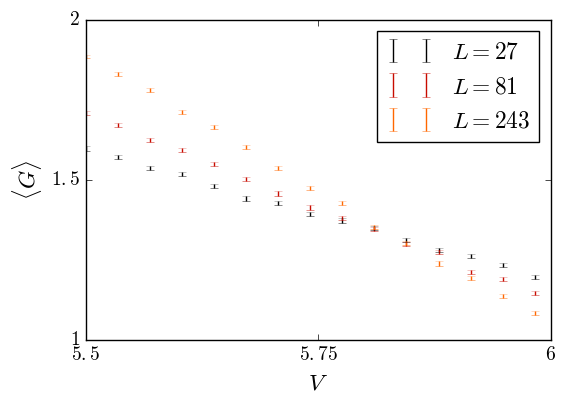

In [4]:
data = np.loadtxt(data_folder + 'data_from_doru.dat')

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_prop_cycle('alpha', [.66, .33, 0])

cmap = plt.get_cmap('gist_heat')
for i in range(3):
    x, y = data[i::3, 0], data[i::3, 2]
    error = data[i::3, 3]
    L = data[i, 1]
    color = cmap(np.log(L-26)/np.log(243-26) * .7)
    ax.errorbar(x, y, yerr=error, label="$L=%i$" % L, color=color)
    
plt.legend()

plt.xlabel('$V$')
plt.ylabel(r'$\langle G \rangle$')

evals = [5.5, 5.75, 6]
ax.set_xticks(evals)
ax.set_xticklabels(["${0}$".format(i) for i in evals])

evals = [1, 1.5, 2]
ax.set_yticks(evals)
ax.set_yticklabels(["${0}$".format(i) for i in evals])

ax.set_xlim(5.5, 6.0)
ax.set_ylim(1.0, 2.0)
plt.show()

(We thank Doru Sticlet for providing the data for this plot)

The plot above was computed for a 2D tight-binding model in class AII, essentially electrons hopping on a square lattice in the presence of a strong Rashba spin-orbit coupling. In this case, the average conductance was computed as a function of onsite disorder strength $V$.

We see that there is a point $V = V_c\simeq 5.8$ which distiguishes two different behaviors. For $V < V_c$, conductance increases with system size: the system is metallic. For $V > V_c$, conductance decreases with system size: the system is insulating. Hence by comparing different curves at fixed $V$ we can easily 'see' the sign of the $\beta$ function in our numerical calculations.

At $V = V_c$, all the curves overlap in the same point: we find that $g$ is basically independent of $L$. This is the critical point. In the plot above, the critical value of conductance is $g_c \simeq 1.3$. (Note that in a typical numerical calculations the curves will not cross precisely at the same point because the systems under consideration are too small. This leads to an entire field of study regarding the finite-size corrections to the scaling theory).

Let us study the conductance scaling around this point. The beta function changes sign at $g_c$, and in its vicinity we can consider it to be a linear function of $g$:

$$\beta(g) = \frac{1}{\nu}\,\frac{g-g_c}{g_c}\,,$$

where $\nu$ is just a coefficient and $g-g_c\ll g_c$. On the insulating side of the transition, it is convenient to write down $g  = g_c - \delta g$. Using the fact that $\ln g \simeq - \delta g/ g_c + \ln g_c$, and that $g_c$ does not depend on $L$, one obtains the following scaling equation for $\delta g$,

$$ \frac{d \delta g}{d \ln L} = \frac{\delta g}{\nu}\,.$$

Integrating this equation gives a power law,

$$ \frac{\delta g(L)}{\delta g(L_0)} = \left(\frac{L}{L_0}\right)^{1/\nu}\,. $$

At a fixed $L_0$, the behavior close to the transition is given by $\delta g(L_0) \simeq a(L_0) (V-V_c)$. So we get

$$ g(L) =  g_c - a(L_0)\,(V-V_c) \, (L/L_0)^{1/\nu} = g_c - a(L_0)\,(L/\xi)^{1/\nu}\,.$$

The length $\xi = L_0\,(V-V_c)^{-\nu}\,$ is the localization length, which diverges at the transition point $V=V_c$. The number $\nu$ is known as the *critical exponent*, and determines the scaling behavior of the conductance close to the critical point.

In [5]:
question = r"What would we see if $\beta$ crossed from positive to negative values?"

answers = ["Small conductances would have a metallic phase, where $g$ grows indefinitely, "
           "while large $g$ would lead to an insulator.",
           "We would see a critical phase, where all conductances converge to the same value.",
           r"This is just the same metal-insulator transition since $\beta(g_c) = 0$",
           "This is an impossible scaling function."]

explanation = ("Both larger conductances and smaller conductances flow towards the critical value, "
               "so all systems get the same conductance when their size becomes large enough. "
               "This is an attractive critical point.")

MoocMultipleChoiceAssessment(question=question, answers=answers, correct_answer=1, explanation=explanation)

MoocMultipleChoiceAssessment(**{'question': 'What would we see if $\\beta$ crossed from positive to negative values?', 'answers': ['Small conductances would have a metallic phase, where $g$ grows indefinitely, while large $g$ would lead to an insulator.', 'We would see a critical phase, where all conductances converge to the same value.', 'This is just the same metal-insulator transition since $\\beta(g_c) = 0$', 'This is an impossible scaling function.'], 'display_name': 'Question', 'max_attempts': 2, 'correct_answer': 1, 'explanation': 'Both larger conductances and smaller conductances flow towards the critical value, so all systems get the same conductance when their size becomes large enough. This is an attractive critical point.'})

# Absence of localization for topological insulators

Finally let's remark on how the conductance scaling flow is modified on the protected surfaces of topological insulators.

At large conductances we know that the classical scaling must still hold, since this is just Ohm's law. On the other hand, if we were able to make conductance exactly zero, we would break the bulk-edge correspondence, so $\beta$ cannot be negative at $g \ll 1$.

It turns out, the scaling flow on the surface of a topological insulator is modified by the appearance of an extra term, that vanishes at large conductance, but ensures that there is no localization.

# Conclusions

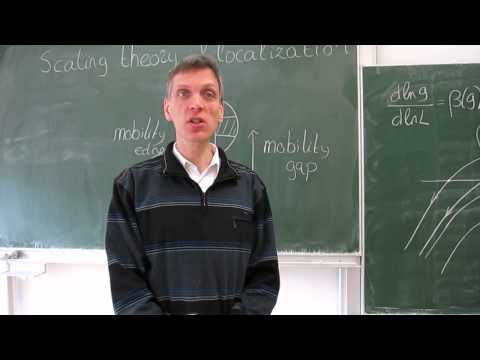

In [6]:
MoocVideo("JdDeBJEBO0s", src_location="9.1-summary")

Questions about what you just learned? Ask them below!

In [7]:
MoocDiscussion("Questions", "Anderson localization")

MoocDiscussion(**{'discussion_category': 'Questions', 'discussion_target': 'Anderson localization', 'discussion_id': '1e62aac195c69654bfcce62d3bd0b090', 'display_name': 'Anderson localization'})